<a href="https://colab.research.google.com/github/Kushalpatel3121/ML-Labs/blob/main/ML_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries 
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [ ]:
#Reading the csv file , del 2 cols from the file, checking first few rows of the file.

from google.colab import files
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['BuyComputer.csv']))

data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

In [ ]:
#Declaring label as the last column of the source file
label1 = data['Purchased'].tolist()
label = np.array(label1)
print(label)

In [ ]:
#Declaring X as all columns excluding last
X = data.iloc[:,0:2]
print(X)

In [ ]:
#Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,label,test_size = 0.4,random_state = 42)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

In [ ]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test)

In [ ]:
# Directly training the model

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train,y_train)

# y_pred = classifier.predict(X_test)
# print(y_pred)

# print("Accuracy : ",accuracy_score(y_test,y_pred))

In [ ]:
#Variabes to calculate sigmoid function
y_pred = []
len_x = len(X_train[0])
w = []
b = 0.2
print(len_x)
entries = len(X_train[:,0])

for weights in range(len_x):
    w.append(0)
w

2


[0, 0]

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))
#Prediction
def predict(input):
    z = np.dot(input, w) + b
    h= sigmoid(z)
    for i in range(len(h)):
        if(h[i]>=0.5):
            h[i]=1
        else:
            h[i]=0
    return h
    #Loss function
def loss_func(y, y1):
    total_bce_loss = np.sum(-y * np.log(y1) - (1 - y) * np.log(1 - y1))
    m = y.shape[0]
    j = total_bce_loss /m
    return j

In [ ]:
dw = []
db = 0
J = 0
alpha = 0.1
for x in range(len_x):
    dw.append(0)

In [ ]:
#Repeating the process 300 times
for i in range(300):
    z = np.dot(X_train, w) + b
    y_pred = sigmoid(z)
    l = loss_func(y_pred, y_train)
    dw = np.dot((y_pred-y_train).T, X_train)/X_train.shape[0]
    db = np.mean(y_pred-y_train)
    w = w - alpha * dw
    b = b - alpha* db
    print("Round:",i,"Weight:",w,"Bias:",b)

<ipython-input-12-1622761bf0c7>:16: RuntimeWarning: divide by zero encountered in log
  total_bce_loss = np.sum(-y * np.log(y1) - (1 - y) * np.log(1 - y1))


Round: 0 Weight: [0.03069456 0.01910722] Bias: 0.18234993360208554
Round: 1 Weight: [0.06054473 0.03760655] Bias: 0.16513884285260955
Round: 2 Weight: [0.08957358 0.05551683] Bias: 0.14835927823399458
Round: 3 Weight: [0.11780518 0.07285753] Bias: 0.13200287723885462
Round: 4 Weight: [0.1452643  0.08964854] Bias: 0.1160605212741687
Round: 5 Weight: [0.17197617 0.10590996] Bias: 0.10052248560409181
Round: 6 Weight: [0.1979662  0.12166189] Bias: 0.08537857935391886
Round: 7 Weight: [0.22325975 0.13692426] Bias: 0.07061827356975754
Round: 8 Weight: [0.24788199 0.15171675] Bias: 0.05623081618455358
Round: 9 Weight: [0.27185771 0.16605864] Bias: 0.042205333453886544
Round: 10 Weight: [0.29521123 0.17996869] Bias: 0.028530917986796453
Round: 11 Weight: [0.31796624 0.19346516] Bias: 0.015196703914389792
Round: 12 Weight: [0.3401458  0.20656568] Bias: 0.002191930027629241
Round: 13 Weight: [0.36177223 0.21928724] Bias: -0.0104940081043833
Round: 14 Weight: [0.38286708 0.23164617] Bias: -0.0228

In [ ]:
#predicting the label
y_pred=predict(X_train)
print(y_pred)

[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]


In [ ]:
#print actual and predicted values in a table
print("actual Value\tpredicted values")
for i in range(len(y_test)):
    print(y_test[i],"\t\t",int(y_pred[i]))

actual Value	predicted values
0 		 0
1 		 0
1 		 0
1 		 0
0 		 1
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
1 		 1
1 		 0
0 		 1
0 		 0
0 		 1
1 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 0
1 		 0
0 		 0
0 		 0
0 		 0
1 		 1
1 		 1
0 		 1
0 		 0
1 		 0
0 		 0
0 		 0
0 		 0
1 		 0
0 		 1
0 		 0
1 		 0
0 		 0
1 		 0
0 		 0
0 		 0
1 		 0
0 		 0
1 		 0
0 		 0
1 		 1
0 		 1
0 		 0
1 		 0
0 		 0
1 		 0
0 		 1
0 		 1
0 		 0
1 		 0
1 		 0
0 		 0
0 		 0
0 		 1
0 		 0
0 		 1
0 		 1
0 		 0
0 		 0
0 		 1
1 		 1
1 		 0
0 		 0
1 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
1 		 1
0 		 0
0 		 0
0 		 0
0 		 1
1 		 0
0 		 1
1 		 1
0 		 0
0 		 0
1 		 0
1 		 0
1 		 0
0 		 0
0 		 0
1 		 0
0 		 1
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
1 		 0


In [ ]:
# Calculating accuracy of prediction
acc = np.sum([y_test[i] == (y_pred[i]) for i in range(len(y_test))])/len(y_test)
print("Accuracy:",acc*100,"%")

Accuracy: 60.0 %


#3.1
Using sklearn LogisticRegression model

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
a = logisticRegr.predict(X_test[0].reshape(1,-1))
a
predictions = logisticRegr.predict(X_test)
print(predictions)
print(y_test)

[0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0]
[0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1]


In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.8


Text(0.5, 257.44, 'Predicted label')

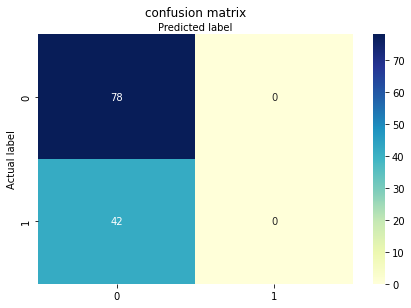

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
# target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        78
           1       0.00      0.00      0.00        42

    accuracy                           0.65       120
   macro avg       0.33      0.50      0.39       120
weighted avg       0.42      0.65      0.51       120



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


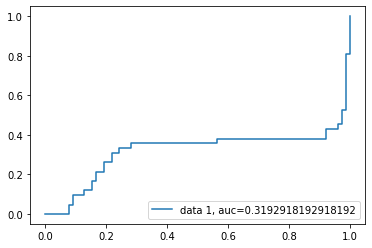

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset,DataLoader
import math
# reading the csv file, del 2 columns from the file, checking first few rows of the file
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/datasets/BuyComputer.csv")
dataset.drop(columns=['User ID',],axis=1,inplace=True)
label = dataset.iloc[:,-1].values
X = dataset.drop("Purchased" ,axis= 1)
# Splitting data
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X,
label, test_size = 0.30, random_state = 28)
# Sacaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

# print(X_Train)
X_Train=torch.from_numpy(X_Train)
y_Train=torch.from_numpy(y_Train)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state = 28)
logisticRegr.fit(X_Train, y_Train)
predictions = logisticRegr.predict(X_Test)
print(predictions)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0]
